## Yelp Data Initial Exploration - Business Data

In [2]:
## preps
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import os

In [2]:
def plotTopFreq(dat, var, top_n, title):
    #cat_data.categories
    Categories={}
    for cat in dat[var].values:
#     print(cat)
        if cat != None:
            all_categories= cat.split(",")
            all_categories = [x.strip() for x in all_categories]
        for x in all_categories:
            try :
                Categories[x] =Categories[x]+1
            except:
                Categories[x]=1
    top_categories = pd.DataFrame.from_dict(data= Categories,orient="index")
    top_categories.reset_index(inplace=True)
    top_categories.columns = ['category', 'occurance']

    x_val=top_categories.sort_values("occurance")[::-1][:top_n].occurance.values
    labels=top_categories.sort_values("occurance")[::-1][:top_n].category.values
    series = pd.Series(x_val, index=labels, name=title)
    series.plot.pie(figsize=(10, 10),startangle=90)
    

## Business Data preview

In [3]:
# load and preview the data
business_data = []
with open("../data/yelp_academic_dataset_business.json") as f:
    for line in f:
        business_data.append(json.loads(line))
business_df = pd.DataFrame.from_dict(business_data)
business_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'..."
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",None
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,None,"Pets, Pet Services, Pet Groomers",None
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.219728,-115.127725,2.5,3,0,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Hardware Stores, Home Services, Building Suppl...","{'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ..."
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726648,4.5,26,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Plumbing, Electricians, Handyma...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '..."


In [4]:
# "name" column name is ambiguous with df.name - change it
business_df = business_df.rename(columns = {'name': 'business_name'})

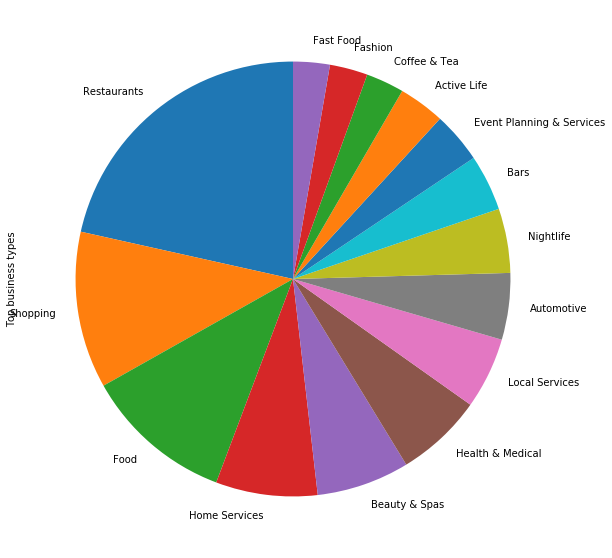

In [5]:
## Top 15 business ategories
plotTopFreq(business_df,"categories",15,"Top business types")

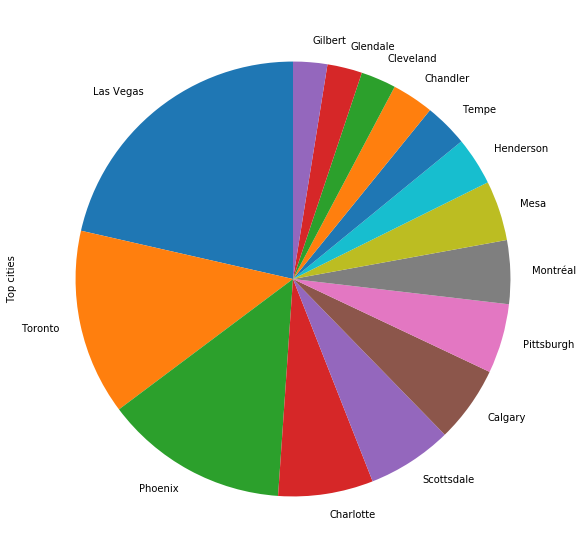

In [6]:
## top cities
plotTopFreq(business_df,"city",15,"Top cities")

### We subset restaurants:


In [7]:
restaurants = (business_df["categories"].str.find("Restaurants")>=0)
bars = (business_df["categories"].str.find("Bars")>=0)
food = (business_df["categories"].str.find("Food")>=0)
food_restaurants_bar = [a or b or c for a, b,c in zip(restaurants, bars, food)]

In [9]:
restaurants.sum()

63944

In [10]:
restaurants_bar = [a or b for a, b in zip(restaurants, bars)]
np.sum(restaurants_bar)

68258

* __We do not need to keep the business universe too broad, since that way the review matrix will be even more sparse. Instead we first only focus on "restaurants"__

In [11]:
foods_df = business_df[restaurants]
print(foods_df.shape)
foods_df.head()

(63944, 14)


,business_id,business_name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
8,pQeaRpvuhoEqudo3uymHIQ,The Empanadas House,404 E Green St,Champaign,IL,61820,40.110446,-88.233073,4.5,5,1,"{'RestaurantsAttire': 'u'casual'', 'Restaurant...","Ethnic Food, Food Trucks, Specialty Food, Impo...","{'Monday': '11:30-14:30', 'Tuesday': '11:30-14..."
20,CsLQLiRoafpJPJSkNX2h5Q,Middle East Deli,4508 E Independence Blvd,Charlotte,NC,28205,35.194894,-80.767442,3.0,5,0,"{'RestaurantsGoodForGroups': 'True', 'OutdoorS...","Food, Restaurants, Grocery, Middle Eastern",None
24,eBEfgOPG7pvFhb2wcG9I7w,Philthy Phillys,"15480 Bayview Avenue, unit D0110",Aurora,ON,L4G 7J1,44.010962,-79.448677,4.5,4,1,"{'RestaurantsTableService': 'False', 'Restaura...","Restaurants, Cheesesteaks, Poutineries","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
25,lu7vtrp_bE9PnxWfA8g4Pg,Banzai Sushi,300 John Street,Thornhill,ON,L3T 5W4,43.820492,-79.398466,4.5,7,1,"{'GoodForKids': 'True', 'RestaurantsTakeOut': ...","Japanese, Fast Food, Food Court, Restaurants",None
30,9sRGfSVEfLhN_km60YruTA,Apadana Restaurant,13071 Yonge Street,Richmond Hill,ON,L4E 1A5,43.947011,-79.454862,3.0,3,1,"{'Ambience': '{'touristy': False, 'hipster': F...","Persian/Iranian, Turkish, Middle Eastern, Rest...","{'Tuesday': '12:0-21:0', 'Wednesday': '12:0-21..."


- __Second, We focus on cities where the reviews per business is high__

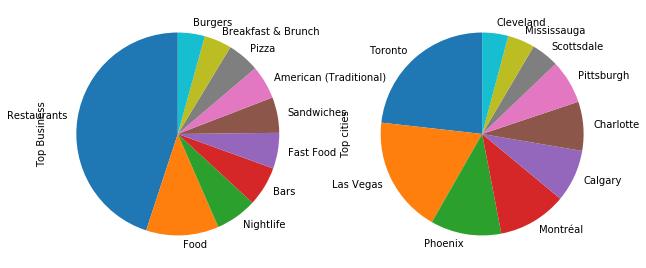

In [12]:
plt.subplot(1,2,1)
plotTopFreq(foods_df,"categories",10,"Top Business")
plt.subplot(1,2,2)
plotTopFreq(foods_df,"city",10,"Top cities")

Text(0.5, 1.0, 'top review counts')

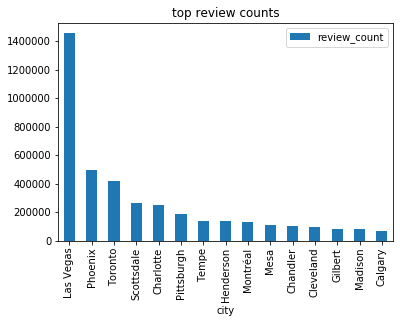

In [13]:
## restaurant review counts by city
review_count = foods_df.groupby("city", as_index=False)["review_count"].agg(sum).sort_values(by = "review_count", ascending = False)
top_reviews = review_count.iloc[:15]
top_reviews = top_reviews.set_index("city")
top_reviews.plot.bar()
plt.title("top review counts")

In [14]:
top_reviews

,review_count
city,
Las Vegas,1455115
Phoenix,492298
Toronto,420499
Scottsdale,264074
Charlotte,251373
Pittsburgh,188626
Tempe,136360
Henderson,134738
Montréal,133332


In [15]:
top_reviews.iloc[:30].index.values

array(['Las Vegas', 'Phoenix', 'Toronto', 'Scottsdale', 'Charlotte',
       'Pittsburgh', 'Tempe', 'Henderson', 'Montréal', 'Mesa', 'Chandler',
       'Cleveland', 'Gilbert', 'Madison', 'Calgary'], dtype=object)

Text(0.5, 1.0, 'Median reviews per retaurants for those cities in top 15 by total reviews')

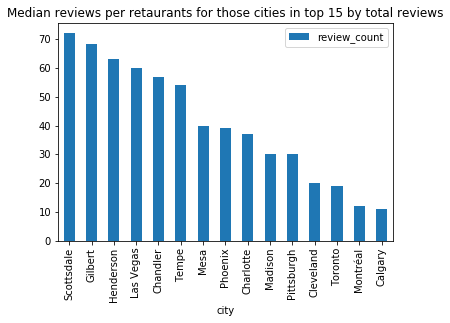

In [16]:
### Top review counts per restaurant
top_avg_reviews = foods_df.groupby("city", as_index=False)["review_count"].median().sort_values("review_count", ascending = False)
top_avg_reviews.loc[top_avg_reviews["city"].isin(top_reviews.index.values)].plot.bar(x = "city", y = "review_count")
plt.title("Median reviews per retaurants for those cities in top 15 by total reviews")

## Finalize our candidate cities:

In [17]:
## For simplicity, we choose the top 5 cities by review counts
top_reviews.iloc[:5]

,review_count
city,
Las Vegas,1455115
Phoenix,492298
Toronto,420499
Scottsdale,264074
Charlotte,251373


In [18]:
## we keep the top candidate cities that have high median reviews per restaurant
candidates = top_avg_reviews.loc[top_avg_reviews["city"].isin(top_reviews.iloc[:5].index.values)]
print("Avg reviews per restaurant:")
print(candidates)

Avg reviews per restaurant:
           city  review_count
661  Scottsdale          72.0
311   Las Vegas          60.0
533     Phoenix          39.0
107   Charlotte          37.0
731     Toronto          19.0


In [19]:
df_res_business = foods_df[foods_df["city"].isin(candidates["city"])]
df_res_business.to_csv("../data/business_data_subset.csv", index = None)

In [21]:
df_res_business.head()

,business_id,business_name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
20,CsLQLiRoafpJPJSkNX2h5Q,Middle East Deli,4508 E Independence Blvd,Charlotte,NC,28205,35.194894,-80.767442,3.0,5,0,"{'RestaurantsGoodForGroups': 'True', 'OutdoorS...","Food, Restaurants, Grocery, Middle Eastern",None
33,vjTVxnsQEZ34XjYNS-XUpA,Wetzel's Pretzels,"4550 East Cactus Rd, #KSFC-4",Phoenix,AZ,85032,33.602822,-111.983533,4.0,10,1,"{'GoodForKids': 'True', 'RestaurantsTakeOut': ...","Food, Pretzels, Bakeries, Fast Food, Restaurants","{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'..."
36,fnZrZlqW1Z8iWgTVDfv_MA,Carl's Jr,9595 W Tropicana Ave,Las Vegas,NV,89147,36.099738,-115.301568,2.5,15,0,"{'Alcohol': 'u'none'', 'WiFi': 'u'no'', 'GoodF...","Mexican, Restaurants, Fast Food",None
38,rVBPQdeayMYht4Uv_FOLHg,Gourmet Burger Company,843 Kipling Avenue,Toronto,ON,M8Z 5G9,43.633291,-79.531768,3.0,13,0,"{'RestaurantsPriceRange2': '2', 'RestaurantsAt...","Restaurants, Burgers, Food",None
42,fhNf_sg-XzZ3e7HEVGuOZg,Meat Chix And Wieners,6530 S Decatur Blvd,Las Vegas,NV,89118,36.071196,-115.207463,3.0,10,0,"{'RestaurantsPriceRange2': '2', 'BusinessParki...","Burgers, Restaurants, American (Traditional), ...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."


In [4]:
df_res_bus = pd.read_csv("../data/business_data_subset.csv", index_col= None)
df_res_bus_ids = df_res_bus.business_id.unique()
df_res_bus.head()

,business_id,business_name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,CsLQLiRoafpJPJSkNX2h5Q,Middle East Deli,4508 E Independence Blvd,Charlotte,NC,28205,35.194894,-80.767442,3.0,5,0,"{'RestaurantsGoodForGroups': 'True', 'OutdoorS...","Food, Restaurants, Grocery, Middle Eastern",NaN
1,vjTVxnsQEZ34XjYNS-XUpA,Wetzel's Pretzels,"4550 East Cactus Rd, #KSFC-4",Phoenix,AZ,85032,33.602822,-111.983533,4.0,10,1,"{'GoodForKids': 'True', 'RestaurantsTakeOut': ...","Food, Pretzels, Bakeries, Fast Food, Restaurants","{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'..."
2,fnZrZlqW1Z8iWgTVDfv_MA,Carl's Jr,9595 W Tropicana Ave,Las Vegas,NV,89147,36.099738,-115.301568,2.5,15,0,"{'Alcohol': ""u'none'"", 'WiFi': ""u'no'"", 'GoodF...","Mexican, Restaurants, Fast Food",NaN
3,rVBPQdeayMYht4Uv_FOLHg,Gourmet Burger Company,843 Kipling Avenue,Toronto,ON,M8Z 5G9,43.633291,-79.531768,3.0,13,0,"{'RestaurantsPriceRange2': '2', 'RestaurantsAt...","Restaurants, Burgers, Food",NaN
4,fhNf_sg-XzZ3e7HEVGuOZg,Meat Chix And Wieners,6530 S Decatur Blvd,Las Vegas,NV,89118,36.071196,-115.207463,3.0,10,0,"{'RestaurantsPriceRange2': '2', 'BusinessParki...","Burgers, Restaurants, American (Traditional), ...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."


(24401, 14)
AxesSubplot(0.125,0.125;0.775x0.755)


Text(0.5, 1.0, 'number of restaurants')

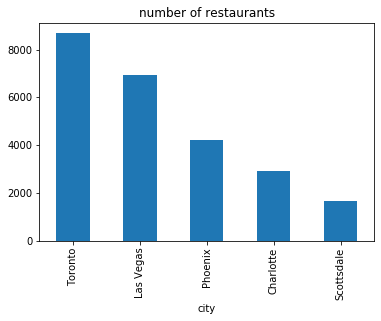

In [5]:
print(df_res_bus.shape)
print(df_res_bus.groupby(["city"])["business_id"].size().sort_values(ascending = False).plot.bar())
plt.title("number of restaurants")

********************************************************************************
Total Reviews:
AxesSubplot(0.125,0.125;0.775x0.755)
********************************************************************************
Reviews per restaurant:


,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
Scottsdale,1652.0,159.851090,244.384220,3.0,21.00,72.0,186.25,2369.0
Las Vegas,6931.0,209.943010,470.989328,3.0,18.00,60.0,200.00,10129.0
Phoenix,4217.0,116.741285,220.157249,3.0,13.00,39.0,129.00,3515.0
Charlotte,2922.0,86.027721,142.129921,3.0,12.25,37.0,100.00,2028.0
Toronto,8679.0,48.450167,90.514142,3.0,7.00,19.0,52.00,2758.0


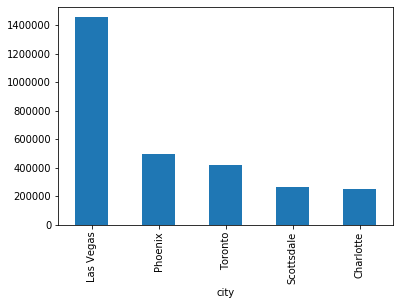

In [6]:
print("*"*80)
print("Total Reviews:")
print(df_res_bus.groupby(["city"])["review_count"].agg(sum).sort_values(ascending = False).plot.bar())
print("*"*80)
print("Reviews per restaurant:")
df_res_bus.groupby(["city"])["review_count"].describe().sort_values("50%", ascending = False) 

## Review Data

In [ ]:
## Review data for restaurants
## This will take a long time

review_data_samp = []
count = 0
count_cap = 1e9

with open("../data/yelp_academic_dataset_review.json") as f:
    for line in f:
        if json.loads(line)["business_id"] in df_res_bus_ids:
            review_data_samp.append(json.loads(line))
        count+= 1
        if count > count_cap:
            break     
review_df_samp = pd.DataFrame.from_dict(review_data_samp)
review_df_samp.to_csv("../data/reviews_data_subset.csv", index=None)

In [7]:
reviews_df = pd.read_csv("../data/reviews_data_subset.csv")
reviews_df.head()
reviews_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,i6g_oA9Yf9Y31qt0wibXpw,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,1.0,0.0,0.0,0.0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",2011-05-27 05:30:52
1,JA-xnyHytKiOIHl_ztnK9Q,P6apihD4ASf1vpPxHODxAQ,e_BiI4ej1CW1F0EyVLr-FQ,5.0,0.0,0.0,0.0,Most delicious authentic Italian I've had in t...,2015-02-16 06:48:47
2,bVTjZgRNq8ToxzvtiVrqMA,2hRe26HSCAWbFRn5WChK-Q,d4qwVw4PcN-_2mK2o1Ro1g,1.0,0.0,0.0,0.0,10pm on a super bowl Sunday and they're alread...,2015-02-02 06:28:00
3,UGErdm6bt48SXTVwJIti2Q,QodunSzok4nIYFNrTSGesQ,poSV39UqEg-gpESXafS9-g,3.0,0.0,0.0,0.0,My husband and I go there once a week since la...,2018-03-04 01:03:53
4,TeX0eOIeZb_wpo86rCedXQ,RR-2nouBn408e3djxC470g,d4qwVw4PcN-_2mK2o1Ro1g,5.0,0.0,0.0,0.0,Holy heck this place is amazing. I love their ...,2017-02-09 04:25:03


In [9]:
df_merge = pd.merge(reviews_df, df_res_bus[['city','categories', 'business_id',"review_count"]], how = "outer", on ="business_id")
df_merge.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,city,categories,review_count
0,i6g_oA9Yf9Y31qt0wibXpw,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,1.0,0.0,0.0,0.0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",2011-05-27 05:30:52,Las Vegas,"Restaurants, Mexican",56.0
1,Q9pkOKlRbHZy1pTUkTcBnQ,m-BZLIIh5PCAKnzH0qj_0Q,5JxlZaqCnk1MnbgRirs40Q,3.0,2.0,1.0,1.0,The three stars here don't represent a real re...,2012-06-26 07:51:00,Las Vegas,"Restaurants, Mexican",56.0
2,Y6hcNJ2bek3hSG4wm4UHKQ,PKEzKWv_FktMm2mGPjwd0Q,5JxlZaqCnk1MnbgRirs40Q,4.0,4.0,1.0,1.0,"I've been here several times, but I never revi...",2011-02-15 02:35:38,Las Vegas,"Restaurants, Mexican",56.0
3,E7Qtf8zR-e2wXFpVuaNDWQ,GdnJtqYWVSBAjya-WdN5RQ,5JxlZaqCnk1MnbgRirs40Q,2.0,2.0,0.0,0.0,I took my folks here last weekend for dinner o...,2012-05-30 18:54:30,Las Vegas,"Restaurants, Mexican",56.0
4,Q3kju7l36U0KWfuZRL_wlw,bX_VFU48rabrU_yHNL2XZg,5JxlZaqCnk1MnbgRirs40Q,4.0,0.0,0.0,0.0,"Above average in taste & presentation, which i...",2012-11-07 00:05:33,Las Vegas,"Restaurants, Mexican",56.0


In [10]:
df_merge.dropna(inplace=True)

In [11]:
df_merge.city.unique()

array(['Las Vegas', 'Scottsdale', 'Phoenix', 'Toronto', 'Charlotte'],
      dtype=object)

In [12]:
x = df_merge.groupby(["city","user_id"]).size().reset_index()
print("users' reviews summary statistics")
x.groupby("city").describe()

users' reviews summary statistics


0                                                 
               count      mean        std  min  25%  50%  75%     max
city                                                                 
Charlotte    86527.0  3.008980   9.245163  1.0  1.0  1.0  2.0   510.0
Las Vegas   536321.0  2.803996   8.081294  1.0  1.0  1.0  2.0  1502.0
Phoenix     190688.0  2.679676   6.866005  1.0  1.0  1.0  2.0   590.0
Scottsdale  117308.0  2.340889   5.873821  1.0  1.0  1.0  2.0   684.0
Toronto     102616.0  4.214538  13.077260  1.0  1.0  1.0  3.0  1130.0

Text(0.5, 1.0, 'Average reviews per User')

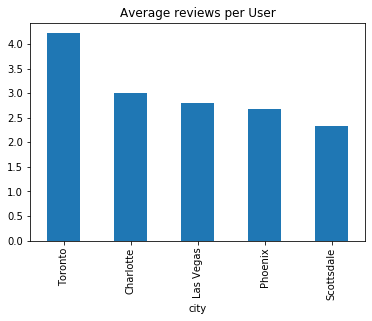

In [13]:
x.groupby("city").describe()[(0, "mean")].sort_values(ascending = False).plot.bar()
plt.title("Average reviews per User")

## User Data

In [ ]:
## get a list of user ids that had reviews for our candidate cities
users_ids_subset = ratings_.user_id.unique().tolist()

In [ ]:
user_data_samp = []

with open("../data/yelp_academic_dataset_user.json") as f:
    for line in f:
        if json.loads(line)["user_id"] in users_ids_subset:
            user_data_samp.append(json.loads(line))
            
user_data_samp = pd.DataFrame.from_dict(user_data_samp)
user_data_samp.to_csv("../data/user_df.csv", index=None)

In [ ]:
user_data_samp.head()